# 1. Introduction 

This project utilizes the K-nearest neighbor algorithm to classifier the survivors in the Titanic dataset. The goal is to create several models using various spliting ratios as well as different k-values to determine which parameters build the best model.

## 1.1 Research Question

Can we use KNN to predict who survived or did not survive in the Titanic?

## 1.2 Metric for Success

The goal is to build a model that produces an accuracy level of between 80 to 85%. The model with the highest accuracy will be picked.

# 2. Reading the Data

In [1]:
# Importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.style.use('bmh')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the train data

titanic_train = pd.read_csv('/content/train (5).csv')

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Loading our test dataset

titanic_test = pd.read_csv('/content/test (1).csv')

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Checking the Data 

In [4]:
# Checking the shape of the data

print(titanic_train.shape)

print('\n')

print(titanic_test.shape)

(891, 12)


(418, 11)


In [5]:
# Checking information in our datasets

print(titanic_train.info())

print('\n')

print(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

# 4. Cleaning the Data 

In [6]:
# Checking for null values

print(titanic_train.isna().sum())

print('\n')

print(titanic_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


> Age, Fare and Embarked attributes have null values. We will only need to deal with the null values in the Age column because we will use it as a feature in our model.

In [7]:
# Dropping Null values in Embarked and Fare

titanic_train.dropna(subset = ['Embarked'], inplace = True)
titanic_test.dropna(subset = ['Fare'], inplace = True)

# Dropping the missing row with missing value in the Fare column

titanic_test.dropna(subset=['Fare'], inplace = True)

In [8]:
# Filling the missing values in the Age feature

titanic_train = titanic_train.fillna(titanic_train['Age'].mean())

titanic_test = titanic_test.fillna(titanic_test['Age'].mean())

In [9]:
# We need to drop the columns that we will not need for our modelling

titanic_train = titanic_train.drop(['Name','Ticket','Cabin','PassengerId'], axis = 1)

titanic_test = titanic_test.drop(['Name','Ticket','Cabin','PassengerId'], axis = 1)

## 5. Feature Engineering

In [10]:
# Previewing the train dataset

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# Previewing the test dataset

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [12]:
# Label encoding the categorical features

from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

train_encode = ['Sex', 'Embarked']

test_encode = ['Sex', 'Embarked']

for column in train_encode:

  titanic_train[column] = en.fit_transform(titanic_train[column])

for column in test_encode:

  titanic_test[column] = en.fit_transform(titanic_test[column])

In [13]:
# Previewing the train dataset

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [14]:
# Previewing the test dataset

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


# 6. Exploratory Data Analysis

We will only be doing Exploratory Data Analysis on the training dataset.

In [15]:
# Describing our data

titanic_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.642093,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.968346,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.642093,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


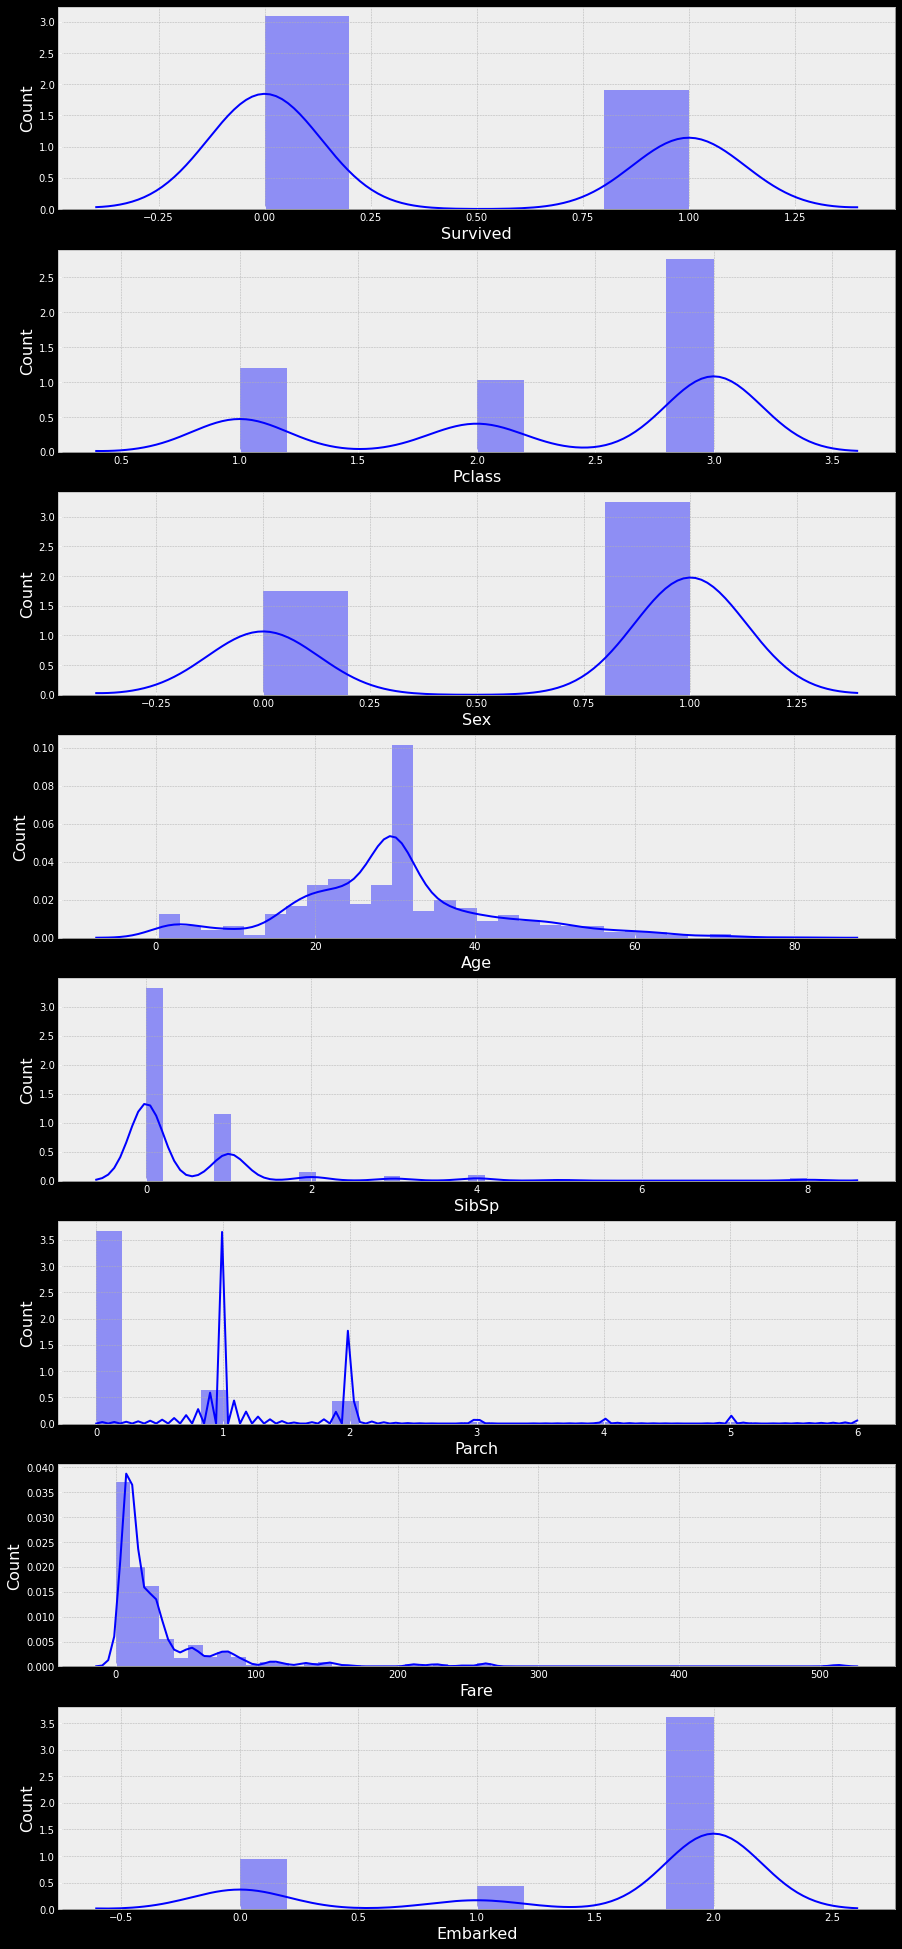

In [39]:
# Plotting the frequency distribution plots
plt.style.use('dark_background')
plt.style.use('bmh')

columns = titanic_train.columns.tolist()

fig, ax = plt.subplots(len(titanic_train.columns), figsize=(15,35))

for i, col_val in enumerate(titanic_train):
  sns.distplot(titanic_train[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_xlabel(col_val, fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

Text(0.5, 1.0, 'Pairplot for Features in Titanic Dataset')

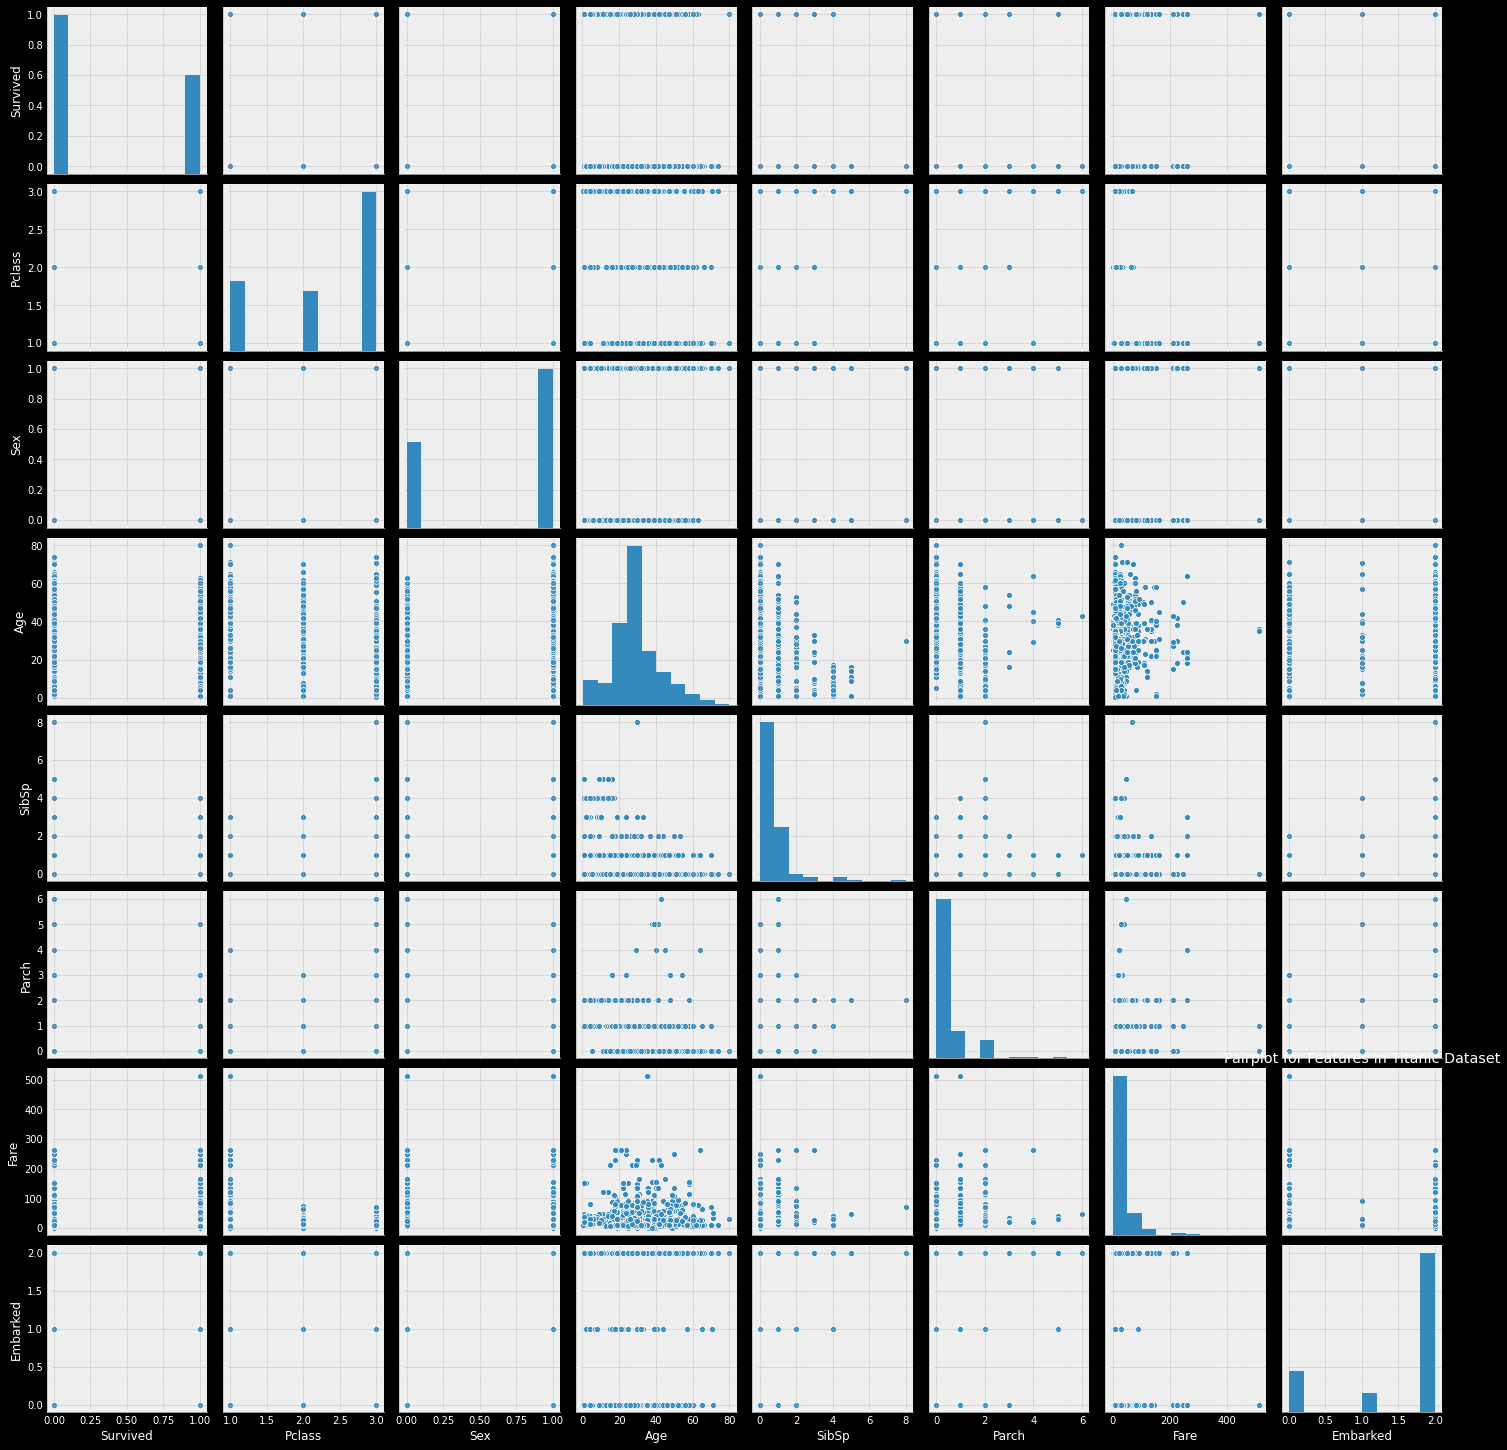

In [40]:
# Getting the pair plots
plt.style.use('dark_background')
plt.style.use('bmh')

sns.pairplot(titanic_train)

plt.title("Pairplot for Features in Titanic Dataset")

> The pair plot reveals that there is no relationship between our variables. This means that there is no correlation between our features.

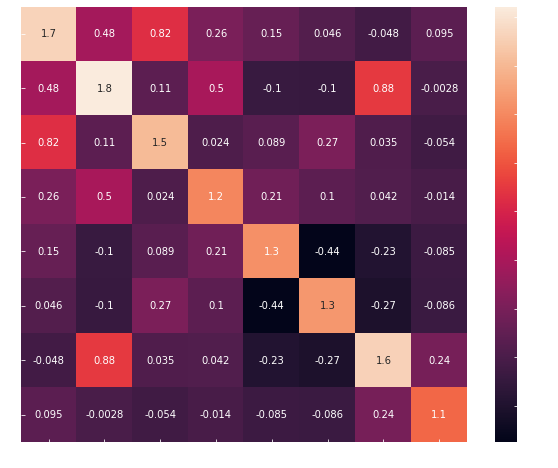

In [16]:
# Checking for correlation 

corr_train = titanic_train.corr()

vif_train = pd.DataFrame(np.linalg.inv(corr_train.values), index = corr_train.index, columns = corr_train.columns)

plt.figure(figsize = (10,8))

sns.heatmap(vif_train, annot = True)


> The VIF of our variables is below 5 so our features are suitable for modelling.

# 7. Modelling

In [17]:
# Extracting features from the dataset

X = titanic_train.drop(['Survived'], axis = 1).values

y = titanic_train['Survived'].values

In [18]:
titanic_train.shape


(889, 8)

## 7.1 Modelling KNN No Splitting

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scaling the model

scaler = StandardScaler()

X = scaler.fit_transform(X)

# Fitting the model 

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X, y)

# Using the entire test set to predict

y_pred = classifier.predict(X)

# Evaluating our model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Accuracy score:",accuracy_score(y, y_pred)* 100)

print(confusion_matrix(y, y_pred))

print(classification_report(y, y_pred))

Accuracy score: 85.60179977502813
[[497  52]
 [ 76 264]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       549
           1       0.84      0.78      0.80       340

    accuracy                           0.86       889
   macro avg       0.85      0.84      0.85       889
weighted avg       0.86      0.86      0.85       889



## 7.2 KNN with Splitting

In [24]:

test_sizes = [0.2, 0.3, 0.4,0.5]

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler

for test in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 25)
    
    # Scaling the data 

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Fitting our model

    classifier = KNeighborsClassifier(n_neighbors = 5)
    classifier.fit(X_train, y_train)
    
    # Predicting using our model
    y_pred = classifier.predict(X_test)

    # Evaluating model

    print("Our results when using {} test size.".format(test))

    print("Accuracy score:",accuracy_score(y_test, y_pred)* 100)

    print(confusion_matrix(y_test, y_pred))

    print(classification_report(y_test, y_pred))

    print('\n')

Our results when using 0.2 test size.
Accuracy score: 76.40449438202246
[[88 20]
 [22 48]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       108
           1       0.71      0.69      0.70        70

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



Our results when using 0.3 test size.
Accuracy score: 79.40074906367042
[[140  24]
 [ 31  72]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       164
           1       0.75      0.70      0.72       103

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



Our results when using 0.4 test size.
Accuracy score: 80.0561797752809
[[188  24]
 [ 47  97]]
              precision    recall  f1-score   support

       

# 8. Improving the Model - Tuning Parameters

* For the model improvement, I will be tuning the value of K to see which value is most appropriate with different splits.

## 8.1 Using 80-20 Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# Scaling the variables 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_values = [3, 5, 7, 9, 11, 13, 15, 17, 20, 25]

for i in k_values:
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  print("Our results when using {} as the k value.".format(i))
  print("Accuracy score:",accuracy_score(y_test, y_pred)* 100)
  print("\n")


Our results when using 3 as the k value.
Accuracy score: 77.52808988764045


Our results when using 5 as the k value.
Accuracy score: 76.40449438202246


Our results when using 7 as the k value.
Accuracy score: 75.84269662921348


Our results when using 9 as the k value.
Accuracy score: 75.28089887640449


Our results when using 11 as the k value.
Accuracy score: 78.08988764044943


Our results when using 13 as the k value.
Accuracy score: 79.21348314606742


Our results when using 15 as the k value.
Accuracy score: 76.40449438202246


Our results when using 17 as the k value.
Accuracy score: 78.65168539325843


Our results when using 20 as the k value.
Accuracy score: 79.21348314606742


Our results when using 25 as the k value.
Accuracy score: 78.65168539325843




> With a 80-20, the best k-value to use is 13 because it has an accuracy of 79.21%.

## 8.2 Using 70-30 Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

# Scaling the variables 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_values = [3, 5, 7, 9, 11, 13, 15, 17, 20, 25]

for i in k_values:
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  print("Our results when using {} as the k value.".format(i))
  print("Accuracy score:",accuracy_score(y_test, y_pred)* 100)
  print("\n")


Our results when using 3 as the k value.
Accuracy score: 78.27715355805243


Our results when using 5 as the k value.
Accuracy score: 79.40074906367042


Our results when using 7 as the k value.
Accuracy score: 77.15355805243446


Our results when using 9 as the k value.
Accuracy score: 78.65168539325843


Our results when using 11 as the k value.
Accuracy score: 80.14981273408239


Our results when using 13 as the k value.
Accuracy score: 79.40074906367042


Our results when using 15 as the k value.
Accuracy score: 78.27715355805243


Our results when using 17 as the k value.
Accuracy score: 79.7752808988764


Our results when using 20 as the k value.
Accuracy score: 79.7752808988764


Our results when using 25 as the k value.
Accuracy score: 78.65168539325843




With a 70-30 split, k values of 17 and 20 have the highest accuracy of 79.78%.

## 8.3 Using 60-40 Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 25)

# Scaling the variables 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_values = [3, 5, 7, 9, 11, 13, 15, 17, 20, 25]

for i in k_values:
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  print("Our results when using {} as the k value.".format(i))
  print("Accuracy score:",accuracy_score(y_test, y_pred)* 100)
  print("\n")


Our results when using 3 as the k value.
Accuracy score: 78.08988764044943


Our results when using 5 as the k value.
Accuracy score: 80.0561797752809


Our results when using 7 as the k value.
Accuracy score: 78.93258426966293


Our results when using 9 as the k value.
Accuracy score: 78.65168539325843


Our results when using 11 as the k value.
Accuracy score: 79.7752808988764


Our results when using 13 as the k value.
Accuracy score: 80.33707865168539


Our results when using 15 as the k value.
Accuracy score: 80.0561797752809


Our results when using 17 as the k value.
Accuracy score: 81.17977528089888


Our results when using 20 as the k value.
Accuracy score: 80.0561797752809


Our results when using 25 as the k value.
Accuracy score: 79.49438202247191




With a 60-40 split, a k value of 17 has the highest accuracy of 81.18%.

# 9. Conclusion 

* Applying KNN without splitting gives us the highest accuracy. This is because the model had more data to train on which means that it was able to fit our points very well. 
* Spliting the data on a 60-40 ratio also gave the best results when spliting the dataset.
* Another observation made is that using a higher integer value for the random state produced better results. 
* With the accuracy scores obtained, it is safe to say that the model is less prone to overfitting. That said, more analysis needs to be done to determine which parameters achieve the best bias - variance tradeoff. 